In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename_list = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']

datastore = {}
for filename in filename_list:
    with open (filename, 'r') as f:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        arrtime = []
        intensity = []
        for dataline in f:
            dataline = dataline.replace('\n', '')
            arrtime_intensity = dataline.split('\t')
            arrtime.append(float(arrtime_intensity[0]))
            intensity.append(float(arrtime_intensity[1]))         
            pairs = list(zip(arrtime, intensity))
        datastore[voltage] = pairs

In [2]:
arrts_for2d = []
intens_for2d = []
volts_for2d = []

#for k, pair in datastore.items():
#    for i in pair:
#        if not i[1]:
#            continue
#        arrts_for2d.append(i[0])
#        intens_for2d.append(i[1])
#        volts_for2d.append(k)
for k, pair in datastore.items():
    for i in pair:
        #if not i[1]: #comment in out for rectbivariatespline
         #   continue #skip this bit of loop without doing anything. ###skips the zero vals###. 
        arrts_for2d.append(i[0])
        intens_for2d.append(i[1])
        volts_for2d.append(k)
                
#going to try without taking out zeros for now

(100, 100)


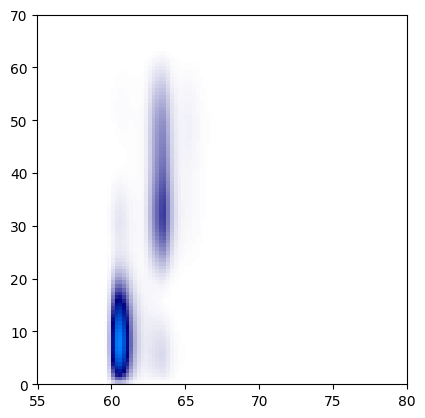

In [3]:
from scipy.interpolate import interp2d, RectBivariateSpline
from matplotlib.colors import LinearSegmentedColormap

#X2d = np.array(arrts_for2d)
#Y2d = np.array(volts_for2d)
#Z2d = np.array(intens_for2d)

X2d = np.array(sorted(set(arrts_for2d))) #flat list
Y2d = np.array(sorted(set(volts_for2d))) #flat list 0 to 70 once
Z2d = np.array(intens_for2d)
Z2d = Z2d.reshape(len(Y2d), len(X2d)).T



#interp_func = interp2d(X2d, Y2d, Z2d, kind='cubic', fill_value=0.0)
interp_func = RectBivariateSpline(X2d, Y2d, Z2d, bbox=[None, None, None, None], kx=3, ky=3, s=0)

X_max = 80
X_min = X2d.min()
Y_min = 0
Y_max = 70

n_smooth = 100

X2d_plot = np.linspace(X_min, X_max, n_smooth)
Y2d_plot = np.linspace(Y_min, Y_max, n_smooth) 

Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)


#Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
print(Intens2d_plot.shape)

density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF','#000080','#0080FF'], N=256)
#density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

fig, ax = plt.subplots()
x_range = (X_min, X_max) #min and max, effectively, cos it's sorted
y_range = (Y_min, Y_max)

aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])

#Intens2d_plot = np.clip(Intens2d_plot, 0.0, None)

ax.imshow(Intens2d_plot.T, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect, vmin=0.0)
#ax.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect, vmin=0.0)
plt.show()

In [4]:
print(X2d)
print(len(Y2d))
print(len(Z2d))
print(X2d.shape, Y2d.shape, Z2d.shape)
print(Intens2d_plot.shape)

[ 54.982  55.228  55.474  55.72   55.966  56.212  56.458  56.704  56.95
  57.196  57.442  57.688  57.934  58.18   58.426  58.672  58.918  59.164
  59.41   59.656  59.902  60.148  60.394  60.64   60.886  61.132  61.378
  61.624  61.87   62.116  62.362  62.608  62.854  63.1    63.346  63.592
  63.838  64.084  64.33   64.576  64.822  65.068  65.314  65.56   65.806
  66.052  66.298  66.544  66.79   67.036  67.282  67.528  67.774  68.02
  68.266  68.512  68.758  69.004  69.25   69.496  69.742  69.988  70.234
  70.48   70.726  70.972  71.218  71.464  71.71   71.956  72.202  72.448
  72.694  72.94   73.186  73.432  73.678  73.924  74.17   74.416  74.662
  74.908  75.154  75.4    75.646  75.892  76.138  76.384  76.63   76.876
  77.122  77.368  77.614  77.86   78.106  78.352  78.598  78.844  79.09
  79.336  79.582  79.828  80.074  80.32   80.566  80.812  81.058  81.304
  81.55   81.796  82.042  82.288  82.534  82.78   83.026  83.272  83.518
  83.764  84.01   84.256  84.502  84.748  84.994  85.2

In [5]:
Volts_new = Y2d_plot # np.linspace(0, 70, 200)

n,m = Intens2d_plot.shape

x_smootharrT_coords = []
y_smoothV_coords = []
smooth_intensities = []


for i in range(n):
    for j in range(m):
        intensity_value = int(Intens2d_plot[j,i])
        x_smootharrT_coords.append(X2d_plot[i])        
        y_smoothV_coords.append(Volts_new[j])
        smooth_intensities.append(intensity_value)
print(len(x_smootharrT_coords)) #40,000
print(len(y_smoothV_coords)) #40,000 i.e. 200*200
print(len(smooth_intensities)) #40,000 i.e. 200*200

smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
smoothxycoords = np.array(smoothxycoords)
smooth_intensities = np.array(smooth_intensities)

print(smoothxycoords.min(axis=0), smoothxycoords.max(axis=0))

10000
10000
10000
[54.982  0.   ] [80. 70.]


(15.554630489073366, 23.391902413224607, 16.929691906780263, 24.17838941387608)


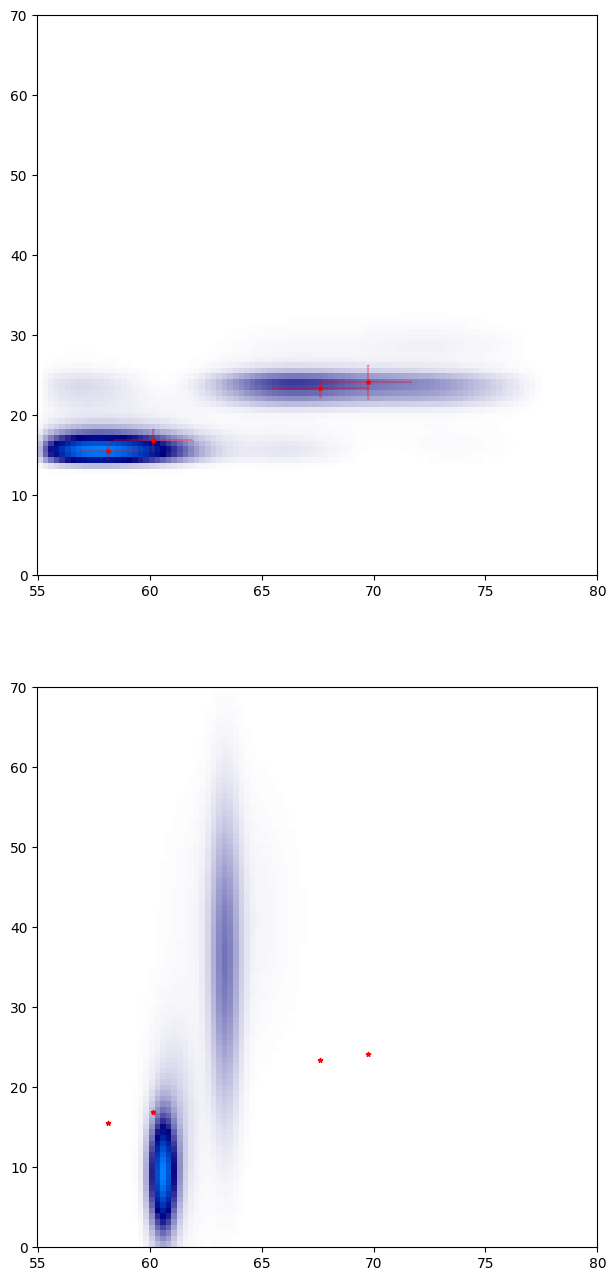

In [9]:
import pomegranate
from pomegranate import GeneralMixtureModel, MultivariateGaussianDistribution, IndependentComponentsDistribution, NormalDistribution
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class MinStdNormalDistributionX(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] =  0#0.6 #0.1 #0.8 #1 #2#0.6
        NormalDistribution.__init__(self, *args, **kw)
class MinStdNormalDistributionY(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 0#5 #8 #1 #5#11 ##stick w 10
        NormalDistribution.__init__(self, *args, **kw)

test_n_components = [4]

fig1, axarr = plt.subplots(2, len(test_n_components), squeeze=False)
fig1.set_size_inches(16,16)

gmmlist = [] #objects for 3,4,5 components
for i, n_comp in enumerate(test_n_components):
 
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=False)
    gmmlist.append(gmm)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum() #sum, as in log space, normally porbs would multiply. 
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp) # For evaluating best n_comp
    
    # For independent x,y normals
    comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
    x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
    y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    
  # Sqrt for Var to Std
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    print(y_vals_mean)

    ax1 = axarr[0,i] #
    ax1.set_xlim(X_min, X_max)
    ax1.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax1.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    ax1.errorbar(x_vals_mean, y_vals_mean, y_vals_std, x_vals_std, fmt='none',
               color='red',alpha=0.3,  label='StdDevs', capsize=0.5)


    #xgap = (max(x_smootharrT_coords) - min(x_smootharrT_coords))/10 
    #x_grange = (min(x_smootharrT_coords)-xgap, max(x_smootharrT_coords)+xgap) 
    #n_grid = 100
    x_points = X2d_plot # np.linspace(X_min, X_max, n_grid) 
    y_points = Y2d_plot # np.linspace(Y_min, Y_max, n_grid)
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
    density = np.exp(density) # Real probs
    density_2d = density.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)

    ax2 = axarr[1,i]
    ax2.set_xlim(X_min, X_max)
    ax2.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax2.imshow(density_2d, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax2.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    
plt.show() 

(100, 100)
(10000,)
(100, 100)
0.005402169150749082
0.006119375254460795


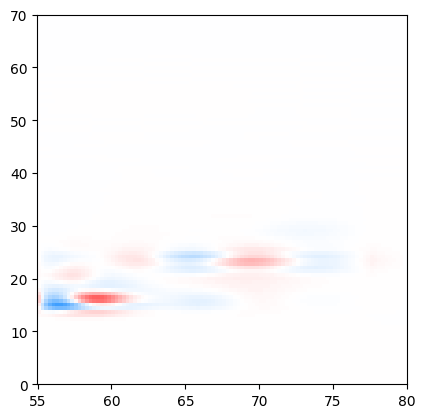

0.00207


In [7]:
print(Intens2d_plot.shape)
print(density.shape)
print(density_2d.shape)

norm_orig = Intens2d_plot/Intens2d_plot.sum()
norm_pred = density_2d/density_2d.sum()
print(norm_orig.max())
print(norm_pred.max())

resid = np.subtract(norm_orig, norm_pred)
residual_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FF0000', '#FFFFFF','#0080FF'], N=256)

fig, ax = plt.subplots()

#vmax = max(resid.max(), -resid.min())
vmax = 0.00207
ax.imshow(resid, cmap=residual_colormap, origin='lower', vmin=-vmax, vmax=vmax, 
          extent=(X_min, X_max, Y_min, Y_max), aspect=aspect)

plt.show()

print(vmax)

In [8]:
##problem here that fitting edges of curves not great, even when throwing silly number of components at it.
##likely because everything stops abruptly at 0 so the interpolation gets confused.
##allow for down to -10V so that it can fit the edges properly. 

##then see if that makes things better. 
##I'm putting this in a new notebook

##update this didn't work that well. 
##trying putting in actual [-10V]key : arrtimes, 0-intensities as values into the datastore at the beginning

##this was better but still not that great.

##so tried the scipy RBTinterpolater but that was weird, prob cos radial where I have really ellipsoid stuff. 

##noticed the CloughTocher2d interpolator link, tried this, worked the best so far (used default settings, could fiddle with 'tol'). 